In [1]:
#Importing libraries
import os
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from contextlib import contextmanager
from time import time
from tqdm import tqdm
#import lightgbm as lgbm
#import category_encoders as ce
#from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

In [2]:
#Importing the dataset
wallmart_data = pd.read_csv('Walmart.csv')

In [3]:
#Understanding the dataset
wallmart_data.head()

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,0,1,2010-02-05,0,1.0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
1,1,1,2010-02-05,0,26.0,11737.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
2,2,1,2010-02-05,0,17.0,13223.76,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
3,3,1,2010-02-05,0,45.0,37.44,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
4,4,1,2010-02-05,0,28.0,1085.29,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315


In [4]:
wallmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    421570 non-null  int64  
 1   Store         421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   IsHoliday     421570 non-null  int64  
 4   Dept          421570 non-null  float64
 5   Weekly_Sales  421570 non-null  float64
 6   Temperature   421570 non-null  float64
 7   Fuel_Price    421570 non-null  float64
 8   MarkDown1     421570 non-null  float64
 9   MarkDown2     421570 non-null  float64
 10  MarkDown3     421570 non-null  float64
 11  MarkDown4     421570 non-null  float64
 12  MarkDown5     421570 non-null  float64
 13  CPI           421570 non-null  float64
 14  Unemployment  421570 non-null  float64
 15  Type          421570 non-null  int64  
 16  Size          421570 non-null  int64  
dtypes: float64(11), int64(5), object(1)
memory usage

In [5]:
wallmart_data.describe()

,Unnamed: 0,Store,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,211611.321278,22.200546,0.070358,44.260317,15981.258123,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,2.410088,136727.915739
std,122195.149363,12.785297,0.255750,30.492054,22711.183519,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,0.666337,60980.583328
min,0.000000,1.000000,0.000000,1.000000,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,1.000000,34875.000000
25%,105782.250000,11.000000,0.000000,18.000000,2079.650000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,2.000000,93638.000000
50%,211603.500000,22.000000,0.000000,37.000000,7612.030000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,3.000000,140167.000000
75%,317424.750000,33.000000,0.000000,74.000000,20205.852500,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,3.000000,202505.000000
max,423285.000000,45.000000,1.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,3.000000,219622.000000


In [6]:
#First will check if there are any duplicate values present
duplicate_rows = wallmart_data.duplicated()
print(wallmart_data[duplicate_rows])

Empty DataFrame
Columns: [Unnamed: 0, Store, Date, IsHoliday, Dept, Weekly_Sales, Temperature, Fuel_Price, MarkDown1, MarkDown2, MarkDown3, MarkDown4, MarkDown5, CPI, Unemployment, Type, Size]
Index: []


In [7]:
#Finding the missing values
print('Missing Values by Count: \n\n',
      wallmart_data.isnull().sum().sort_values(ascending=True),'\n\nMissing Values by %:\n\n',
      wallmart_data.isnull().sum().sort_values(ascending=True)/wallmart_data.shape[0] * 100)

Missing Values by Count: 

 Unnamed: 0      0
Unemployment    0
CPI             0
MarkDown5       0
MarkDown4       0
MarkDown3       0
MarkDown2       0
Type            0
MarkDown1       0
Temperature     0
Weekly_Sales    0
Dept            0
IsHoliday       0
Date            0
Store           0
Fuel_Price      0
Size            0
dtype: int64 

Missing Values by %:

 Unnamed: 0      0.0
Unemployment    0.0
CPI             0.0
MarkDown5       0.0
MarkDown4       0.0
MarkDown3       0.0
MarkDown2       0.0
Type            0.0
MarkDown1       0.0
Temperature     0.0
Weekly_Sales    0.0
Dept            0.0
IsHoliday       0.0
Date            0.0
Store           0.0
Fuel_Price      0.0
Size            0.0
dtype: float64


From the above results we could see there are no duplicate and missing values

In [8]:
#As we dont require that column, we are dropping that
wallmart_data = wallmart_data.drop("Unnamed: 0", axis=1)

In [9]:
wallmart_data.head()

,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,2010-02-05,0,1.0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
1,1,2010-02-05,0,26.0,11737.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
2,1,2010-02-05,0,17.0,13223.76,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
3,1,2010-02-05,0,45.0,37.44,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
4,1,2010-02-05,0,28.0,1085.29,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315


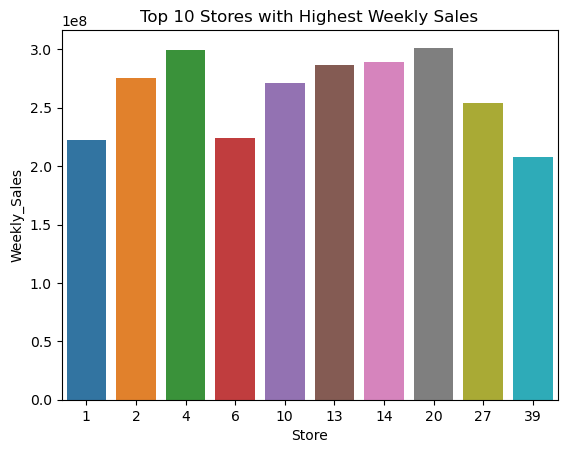

In [10]:
#will explore more with some visualisation with which we can get more information about dataset and find patterns
#Barplot for Top 10 Stores with Highest Weekly Sales
import seaborn as sns
import matplotlib.pyplot as plt

stores_sales = wallmart_data.groupby('Store')['Weekly_Sales'].sum().reset_index()
top_10_stores = stores_sales.sort_values(by='Weekly_Sales', ascending=False).head(10)
sns.barplot(x='Store', y='Weekly_Sales', data=top_10_stores)
plt.title('Top 10 Stores with Highest Weekly Sales')
plt.show()

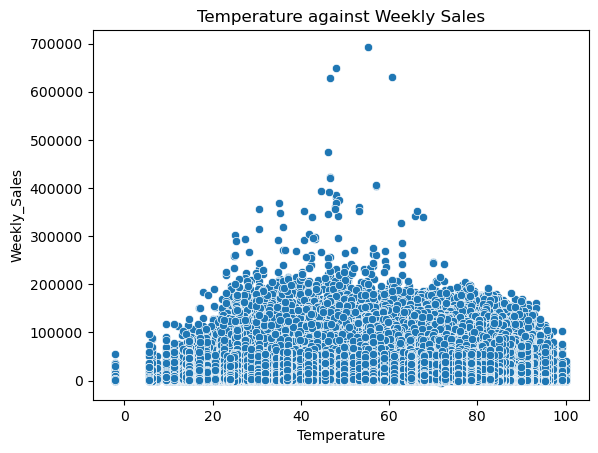

In [11]:
#Scatter plot of sales against temprature to determine its relationship
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=wallmart_data)
plt.title('Temperature against Weekly Sales')
plt.show()

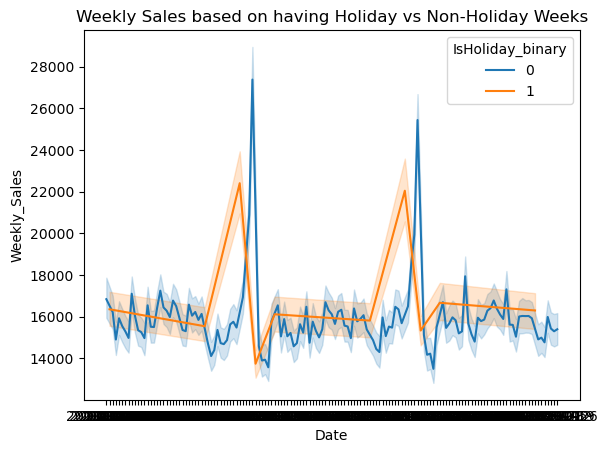

In [12]:
#Line plot for weekly sales based on whether there is a holiday or not
wallmart_data['IsHoliday_binary'] = wallmart_data['IsHoliday'].astype(int)
sns.lineplot(x='Date', y='Weekly_Sales', hue='IsHoliday_binary', data=wallmart_data)
plt.title('Weekly Sales based on having Holiday vs Non-Holiday Weeks')
plt.show()

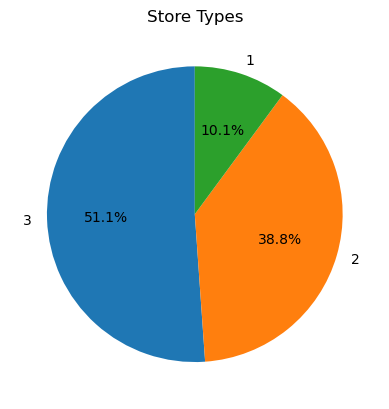

In [13]:
#Pie chart based on store types
store_type_count = wallmart_data['Type'].value_counts()
label = store_type_count.index
size = store_type_count.values
plt.pie(size, labels=label, autopct='%1.1f%%', startangle=90)
plt.title('Store Types')
plt.show()

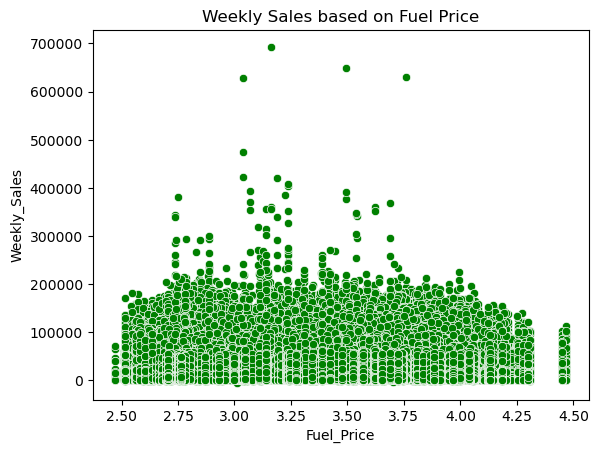

In [14]:
#Scatter plot of sales against fuel price to determine its relationship
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=wallmart_data,color='green')
plt.title('Weekly Sales based on Fuel Price')
plt.show()

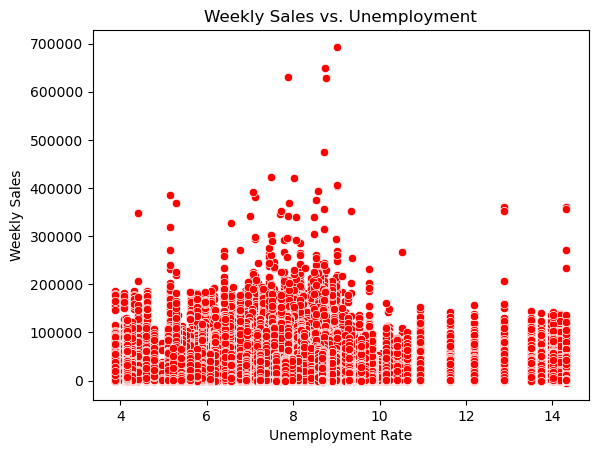

In [15]:
#Weekly sales based based on unemploymnent
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=wallmart_data,color='red')
plt.title('Weekly Sales vs. Unemployment')
plt.xlabel('Unemployment Rate')
plt.ylabel('Weekly Sales')
plt.show()

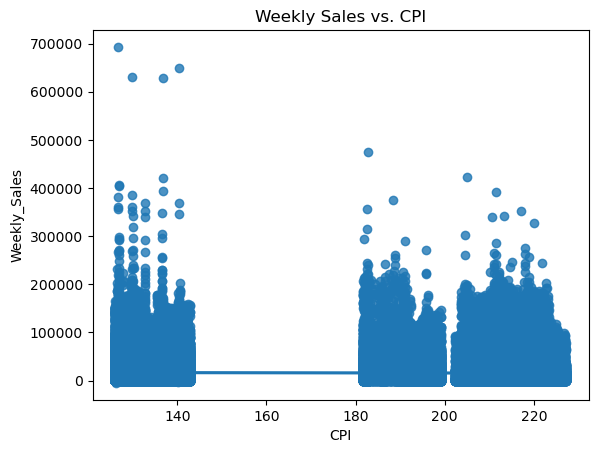

In [16]:
#Weekly sales based on CPI
sns.regplot(x='CPI', y='Weekly_Sales', data=wallmart_data)
plt.title('Weekly Sales vs. CPI')
plt.show()

In [17]:
wallmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Store             421570 non-null  int64  
 1   Date              421570 non-null  object 
 2   IsHoliday         421570 non-null  int64  
 3   Dept              421570 non-null  float64
 4   Weekly_Sales      421570 non-null  float64
 5   Temperature       421570 non-null  float64
 6   Fuel_Price        421570 non-null  float64
 7   MarkDown1         421570 non-null  float64
 8   MarkDown2         421570 non-null  float64
 9   MarkDown3         421570 non-null  float64
 10  MarkDown4         421570 non-null  float64
 11  MarkDown5         421570 non-null  float64
 12  CPI               421570 non-null  float64
 13  Unemployment      421570 non-null  float64
 14  Type              421570 non-null  int64  
 15  Size              421570 non-null  int64  
 16  IsHoliday_binary  42

In [18]:
#Feature Enginerring and Transformation
#converting date column to datetime format
wallmart_data['Date'] = pd.to_datetime(wallmart_data['Date'])

In [19]:
#extracting year and month from the date column
wallmart_data['Year'] = wallmart_data['Date'].dt.year
wallmart_data['Month'] = wallmart_data['Date'].dt.month

In [20]:
#converting IsHoliday to categorical column as it is a
wallmart_data['IsHoliday'] = wallmart_data['IsHoliday'].astype('category')

In [21]:
#encoding categorical columns using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

cat_col = ['IsHoliday', 'Type']
encoder = OneHotEncoder(sparse=False)
encoded_col = pd.DataFrame(encoder.fit_transform(wallmart_data[cat_col]))
encoded_col.column = encoder.get_feature_names(cat_col)
wallmart_data = pd.concat([wallmart_data, encoded_col], axis=1)

C:\Users\gogat\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\gogat\AppData\Local\Temp\ipykernel_47724\2125248694.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  encoded_col.column = encoder.get_feature_names(cat_col)


In [22]:
#droping original categorical columns and date column
wallmart_data = wallmart_data.drop(columns=cat_col)
wallmart_data.drop('Date', axis=1, inplace=True)
wallmart_data.info()
wallmart_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Store             421570 non-null  int64  
 1   Dept              421570 non-null  float64
 2   Weekly_Sales      421570 non-null  float64
 3   Temperature       421570 non-null  float64
 4   Fuel_Price        421570 non-null  float64
 5   MarkDown1         421570 non-null  float64
 6   MarkDown2         421570 non-null  float64
 7   MarkDown3         421570 non-null  float64
 8   MarkDown4         421570 non-null  float64
 9   MarkDown5         421570 non-null  float64
 10  CPI               421570 non-null  float64
 11  Unemployment      421570 non-null  float64
 12  Size              421570 non-null  int64  
 13  IsHoliday_binary  421570 non-null  int32  
 14  Year              421570 non-null  int64  
 15  Month             421570 non-null  int64  
 16  0                 42

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Unemployment,Size,IsHoliday_binary,Year,Month,0,1,2,3,4
0,1,1.0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,...,8.106,151315,0,2010,2,1.0,0.0,0.0,0.0,1.0
1,1,26.0,11737.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,...,8.106,151315,0,2010,2,1.0,0.0,0.0,0.0,1.0
2,1,17.0,13223.76,42.31,2.572,0.0,0.0,0.0,0.0,0.0,...,8.106,151315,0,2010,2,1.0,0.0,0.0,0.0,1.0
3,1,45.0,37.44,42.31,2.572,0.0,0.0,0.0,0.0,0.0,...,8.106,151315,0,2010,2,1.0,0.0,0.0,0.0,1.0
4,1,28.0,1085.29,42.31,2.572,0.0,0.0,0.0,0.0,0.0,...,8.106,151315,0,2010,2,1.0,0.0,0.0,0.0,1.0


In [23]:
from sklearn.model_selection import train_test_split
#Splitting the dataset into input (X) and output variable (y)
X = wallmart_data.drop(columns=['Weekly_Sales'])
y = wallmart_data['Weekly_Sales']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Checking the shape of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (337256, 20) (337256,)
Testing set shape: (84314, 20) (84314,)


In [24]:
#Model Building
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

In [25]:
#Model for Linear Regression
#Initializing the linear regression model
linear_regression = LinearRegression()

#Training the model on the training data
linear_regression.fit(X_train, y_train)

#Making the predictions on the testing data
y_predicted = linear_regression.predict(X_test)

#Evaluation metrices
rmse_lr = np.sqrt(mean_squared_error(y_test, y_predicted)) * 100 / np.mean(y_test)
mae_lr = mean_absolute_error(y_test, y_predicted) * 100 / np.mean(y_test)
aae_lr = mae_lr / (np.mean(y_test) + 1e-6) * 100
r2_lr = r2_score(y_test, y_predicted) 

#Printing the resuls
print('Root Mean Squared Error:', rmse_lr,)
print('Mean Absolute Error:', mae_lr,)
print('Average Absolute Error:', aae_lr,)
print('R-squared:', r2_lr,)

C:\Users\gogat\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Root Mean Squared Error: 135.8415066774738
Mean Absolute Error: 91.1773581233277
Average Absolute Error: 0.5697811640980003
R-squared: 0.08868394770042809


C:\Users\gogat\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


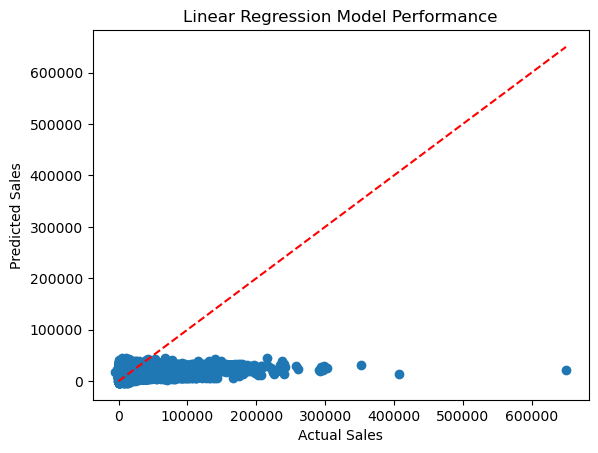

In [26]:
import matplotlib.pyplot as plt
# Creating a scatter plot of the predicted versus actual values
plt.scatter(y_test, y_predicted)
#Adding a diagonal line for reference
plt.plot([0, np.max(y_test)], [0, np.max(y_test)], 'r--')

#Setting the axis labels and title
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Linear Regression Model Performance')

#Showing the plot
plt.show()

So looking at the Results it looks like Linear regression is not a very good model for this as this has high values of RMSE,AAE and very less value of R.

In [27]:
from sklearn.linear_model import Ridge

#Initializing the Ridge Regression model
ridge_regression = Ridge(alpha=1.0)

#Training the model on the training data
ridge_regression.fit(X_train, y_train)

#Making predictions on the testing data
y_predicted = ridge_regression.predict(X_test)

#Evaluation metrices
rmse_rd = np.sqrt(mean_squared_error(y_test, y_predicted)) * 100 / np.mean(y_test)
mae_rd = mean_absolute_error(y_test, y_predicted) * 100 / np.mean(y_test)
aae_rd = mae_rd / (np.mean(y_test) + 1e-6) * 100
r2_rd = r2_score(y_test, y_predicted)

#printing the result
print('Root Mean Squared Error:', rmse_rd,)
print('Mean Absolute Error:', mae_rd,)
print('Average Absolute Error:', aae_rd,)
print('R-squared:', r2_rd,)

Root Mean Squared Error: 135.84150573617595
Mean Absolute Error: 91.17734297672227
Average Absolute Error: 0.5697810694445615
R-squared: 0.08868396033014425


C:\Users\gogat\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\gogat\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


So if we look at the results, there is no improvement at all comapred to Linear regression, so this Model is of not much significance.

In [28]:
from sklearn.tree import DecisionTreeRegressor

#Initialize the decision tree regressor model with max depth 10
decision_tree = DecisionTreeRegressor(max_depth=10)

#Training the model on the training data
decision_tree.fit(X_train, y_train)

#Making predictions on the testing data
y_predicted = decision_tree.predict(X_test)

#Calculating evaluation metrics
rmse_dt = np.sqrt(mean_squared_error(y_test, y_predicted)) * 100 / np.mean(y_test)
mae_dt = mean_absolute_error(y_test, y_predicted) * 100 / np.mean(y_test)
aae_dt = mae_dt / (np.mean(y_test) + 1e-6) * 100
r2_dt = r2_score(y_test, y_predicted) 

print('Root Mean Squared Error:', rmse_dt,)
print('Mean Absolute Error:', mae_dt,)
print('Average Absolute Error:', aae_dt,)
print('R-squared:', r2_dt,)

C:\Users\gogat\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Root Mean Squared Error: 53.71751243121612
Mean Absolute Error: 27.680937372649897
Average Absolute Error: 0.17298238339148606
R-squared: 0.8574931217839917


C:\Users\gogat\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


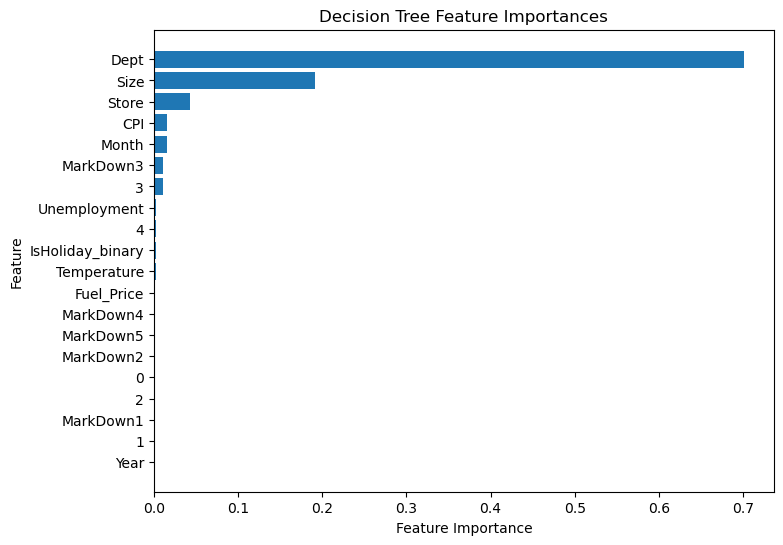

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

#Extracting the feature importances
importances = decision_tree.feature_importances_

#Sorting the features by importance
sorted_indices = importances.argsort()

#Creating a horizontal barplot of feature importances
plt.figure(figsize=(8, 6))
plt.barh(range(len(sorted_indices)), importances[sorted_indices])
plt.yticks(range(len(sorted_indices)), X.columns[sorted_indices])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importances')
plt.show()

So lookinga the results, it gives much improved values with RMSE,AAE and R squared values and if we look at the graph Department and size and store are the once which are contributing much for the sales.

In [30]:
from sklearn.ensemble import RandomForestRegressor

#Initializing the random forest regressor model
random_forest = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

#Training the model on the training data
random_forest.fit(X_train, y_train)

#Making predictions on the testing data
y_prediction = random_forest.predict(X_test)

#Evaluating the model performance
rmse_rf = np.sqrt(mean_squared_error(y_test, y_prediction)) * 100 / np.mean(y_test)
mae_rf = mean_absolute_error(y_test, y_prediction) * 100 / np.mean(y_test)
aae_rf = mae_rf / (np.mean(y_test) + 1e-6) * 100
r2_rf = r2_score(y_test, y_prediction) 

print('Root Mean Squared Error:', rmse_rf,)
print('Mean Absolute Error:', mae_rf,)
print('Average Absolute Error:', aae_rf,)
print('R-squared:', r2_rf,)

C:\Users\gogat\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\gogat\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Root Mean Squared Error: 50.109869591167254
Mean Absolute Error: 25.716562483879308
Average Absolute Error: 0.1607067062509546
R-squared: 0.8759917480984307


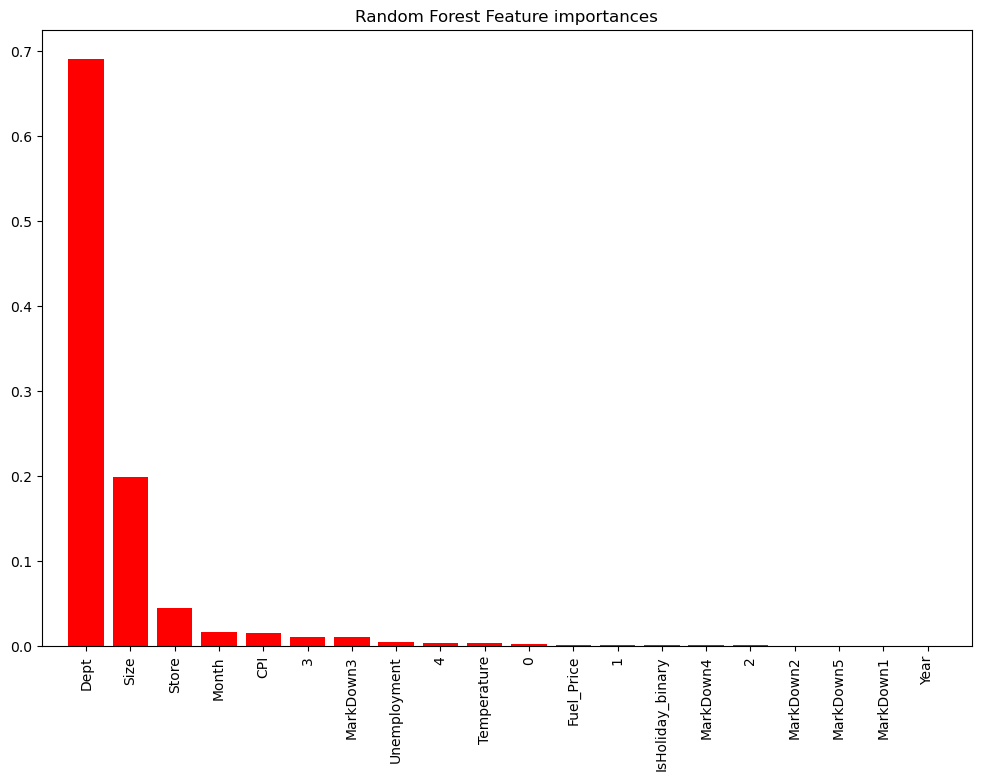

In [31]:
# Ploting feature importances
importances = random_forest.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,8))
plt.title("Random Forest Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

So lookinga the results, it gives much improved values with RMSE,AAE and R squared values and if we look at the graph Department and size and store are the once which are contributing much for the sales.

In [32]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Initializing the XGBRegressor model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

#Training the model on the training data
xgb_model.fit(X_train, y_train)

#Making predictions on the testing data
y_pred = xgb_model.predict(X_test)

#Calculating evaluation metrics
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred)) * 100 / np.mean(y_test)
mae_xgb = mean_absolute_error(y_test, y_pred) * 100 / np.mean(y_test)
aae_xgb = mae_xgb / (np.mean(y_test) + 1e-6) * 100
r2_xgb = r2_score(y_test, y_pred) 

# Print evaluation metrics
print('Root Mean Squared Error:', rmse_xgb,)
print('Mean Absolute Error:', mae_xgb,)
print('Average Absolute Error:', aae_xgb,)
print('R-squared:', r2_xgb,)

Root Mean Squared Error: 37.2167069217091
Mean Absolute Error: 19.887033164074793
Average Absolute Error: 0.12427709181214996
R-squared: 0.9315962477578342


<Figure size 1000x600 with 0 Axes>

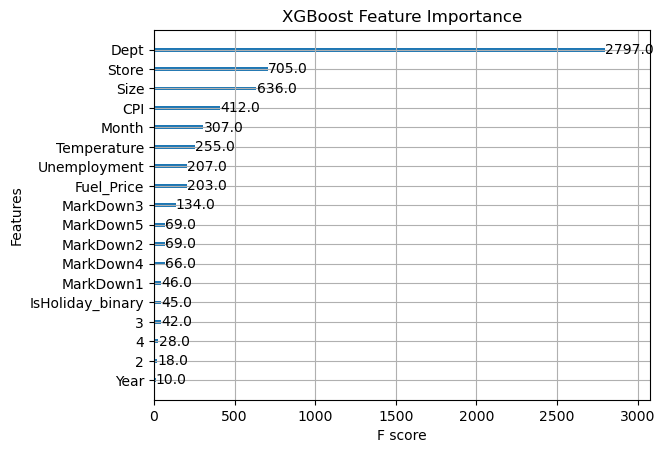

In [33]:
from xgboost import XGBRegressor, plot_importance
import matplotlib.pyplot as plt

# Initialize the XGBoost regressor model
xgb = XGBRegressor()

# Train the model on the training data
xgb.fit(X_train, y_train)

# Visualize the feature importance using plot_importance
plt.figure(figsize=(10,6))
plot_importance(xgb)
plt.title('XGBoost Feature Importance')
plt.show()

So lookinga the results, it gives much improved values with RMSE,AAE and R squared values and if we look at the graph Department and size and store are the once which are contributing much for the sales.

In [34]:
import pandas as pd

# Create a list of model names
models = ['Linear Regression', 'Ridge Regression', 'Decision Tree', 'Random Forest', 'XGBoost']

# Create a dictionary of model metrics
metrics = {
    'RMSE': [rmse_lr, rmse_rd, rmse_dt, rmse_rf, rmse_xgb],
    'MAE': [mae_lr, mae_rd, mae_dt, mae_rf, mae_xgb],
    'AAE': [aae_lr, aae_rd, aae_dt, aae_rf, aae_xgb],
    'R-Squared': [r2_lr, r2_rd, r2_dt, r2_rf, r2_xgb]
}

# Create a pandas DataFrame from the dictionary of model metrics
df = pd.DataFrame(metrics, index=models)

# Print the DataFrame
print(df)

                         RMSE        MAE       AAE  R-Squared
Linear Regression  135.841507  91.177358  0.569781   0.088684
Ridge Regression   135.841506  91.177343  0.569781   0.088684
Decision Tree       53.717512  27.680937  0.172982   0.857493
Random Forest       50.109870  25.716562  0.160707   0.875992
XGBoost             37.216707  19.887033  0.124277   0.931596


From the table above, we can see that XGBoost has the lowest RMSE, MAE, AAE values ​​and the highest R-squared value. This indicates that it is the best performing model among the five models.

Random forest performs well even with low RMSE, MAE, and AAE values ​​and high R-squared values.

The RMSE and MAE of the decision tree model are lower than the linear regression model, but the R-squared value is lower, indicating that it is not as accurate as the ensemble model.

The linear and ridge regression models have the highest RMSE, MAE, and AAE values, the lowest R-squared values, and the least accurate of the five models.

Therefore, based on our evaluation metrics, we can conclude that the XGBoost and Random Forest models are the best choices for this problem. 